# STEP 4: explore uncertainties with PRIM
KPIS of interest: Modal split PT and congestion

## Scenario exploration: PRIM

In [1]:
from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities
from ema_workbench import ema_logging, load_results, Scenario
from ema_workbench.analysis import prim, dimensional_stacking

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as mpl
import numpy as np



ema_logging.log_to_stderr(ema_logging.INFO)



file_name = r'./prim_results/0110_run_ALL_5000.tar.gz'
results = load_results(file_name)




[MainProcess/INFO] results loaded successfully from C:\Users\thomas\Documents\MSc TIL\Afstuderen\EMAWB\thesis project\prim_results\0110_run_ALL_5000.tar.gz


# Modal split PT

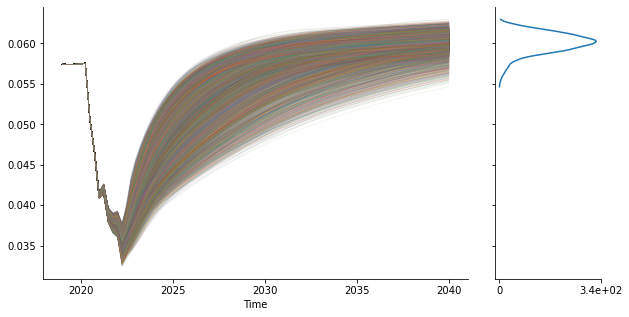

In [52]:

experiments, outcomes = results

fig, _ = lines(experiments, outcomes,outcomes_to_show = "Total Modal split PT" , density =Density.KDE,  titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

In [30]:
def classify(data):
    #get the output for modal split PT
    PTsplit = data['Total Modal split PT']
    return PTsplit[:, -1] > 0.0596

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 3325 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.306, coverage: 0.46015037593984964, density: 1.0 restricted_dimensions: 3


coverage     0.46015
density      1.00000
id          23.00000
mass         0.30600
mean         1.00000
res_dim      3.00000
Name: 23, dtype: float64

                                                      box 23            \
                                                         min       max   
Expected telecommuting                              0.120018  0.270258   
Perception public transport rate of gaining bac...  0.231359  0.599907   
Variable Car cost increase                          0.005202  0.099995   

                                                                                    
                                                                         qp values  
Expected telecommuting                              [-1.0, 2.7447147641058804e-42]  
Perception public transport rate of gaining bac...   [6.036359011644102e-72, -1.0]  
Variable Car cost increase                           [4.090811327649552e-62, -1.0]  



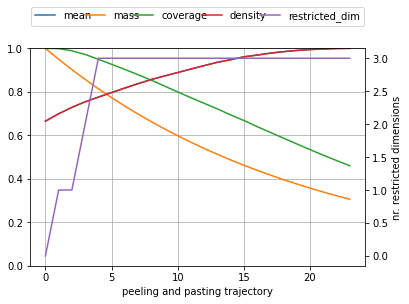

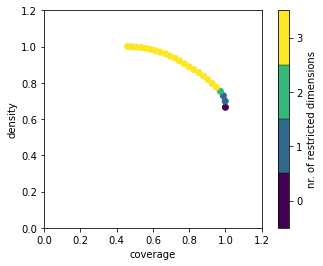

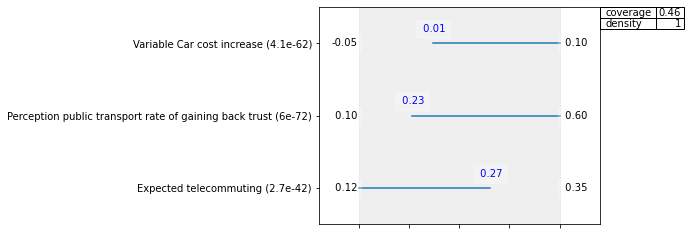

In [31]:
# has to be done for each selected model outcome 
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect()

[MainProcess/INFO] 3501 points remaining, containing 1373 cases of interest
[MainProcess/INFO] mean: 0.9967845659163987, mass: 0.0622, coverage: 0.10812696198116498, density: 0.9967845659163987 restricted_dimensions: 5


coverage     0.212417
density      0.738182
id          28.000000
mass         0.165000
mean         0.738182
res_dim      5.000000
Name: 28, dtype: float64

                                                      box 28            \
                                                         min       max   
Expected telecommuting                              0.120018  0.322253   
Variable public transport cost increase            -0.024996  0.023092   
Percentage of labor force able to work from home    0.400000  0.447962   
Variable Car cost increase                         -0.000385  0.099995   
Perception public transport rate of gaining bac...  0.187968  0.599907   

                                                                                   
                                                                        qp values  
Expected telecommuting                              [-1.0, 9.634189480966082e-09]  
Variable public transport cost increase               [-1.0, 0.21732202

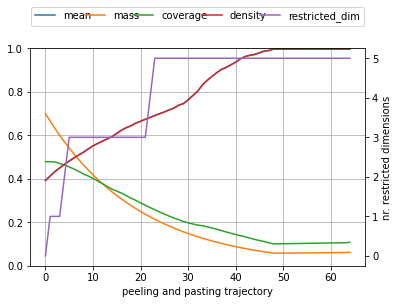

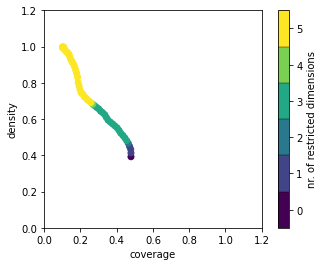

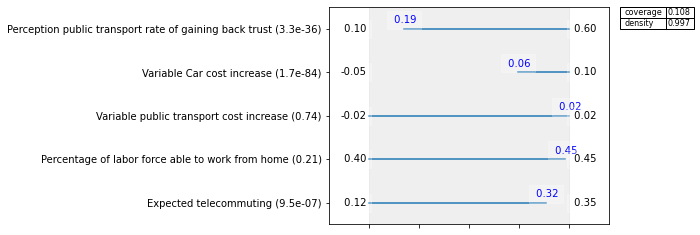

In [64]:
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect(28)

# Congestion < 116

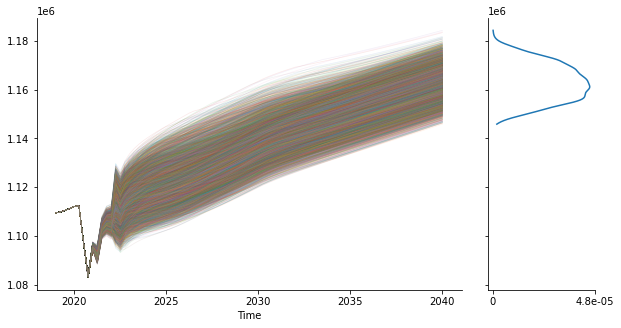

In [15]:

experiments, outcomes = results

fig, _ = lines(experiments, outcomes,outcomes_to_show = "Congestion level" , density =Density.KDE,  titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

In [16]:
def classify(data):
    #get the output for modal split PT
    ConLevel = data['Congestion level']
    return ConLevel [:, -1] < 1160000

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 1897 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1824, coverage: 0.48075909330521877, density: 1.0 restricted_dimensions: 3


coverage     0.480759
density      1.000000
id          33.000000
mass         0.182400
mean         1.000000
res_dim      3.000000
Name: 33, dtype: float64

                                                      box 33            \
                                                         min       max   
Variable Car cost increase                          0.046483  0.099995   
Expected telecommuting                              0.219906  0.350000   
Perception public transport rate of gaining bac...  0.147563  0.599907   

                                                                                    
                                                                         qp values  
Variable Car cost increase                          [4.956754205877241e-272, -1.0]  
Expected telecommuting                               [4.873135759295332e-54, -1.0]  
Perception public transport rate of gaining bac...   [4.784493369592024e-05, -1.0]  



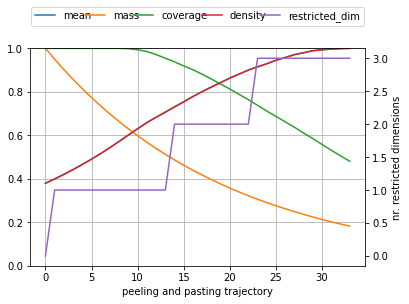

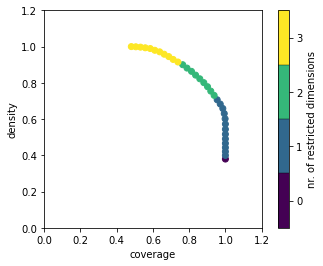

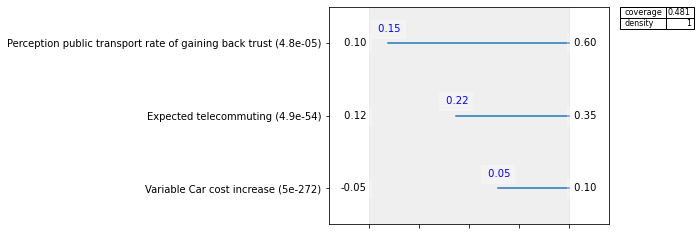

In [17]:
# has to be done for eeach selecte dmodel outcome 
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect()

# Road intensity per distance class

## short

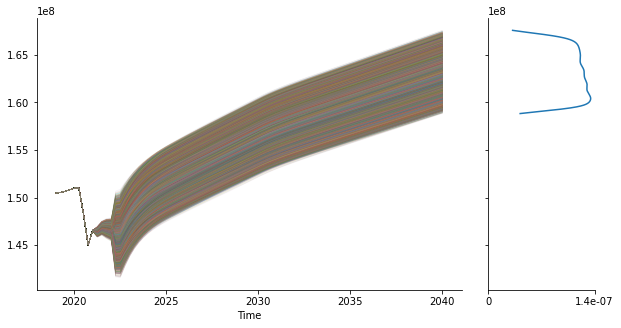

In [18]:

experiments, outcomes = results

fig, _ = lines(experiments, outcomes,outcomes_to_show = "Vehicles per month on the road[short trips]" , density =Density.KDE,  titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

In [21]:
def classify(data):
    #get the output for modal split PT
    VehMonthShort = data['Vehicles per month on the road[short trips]']
    return VehMonthShort [:, -1] < 160000000

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 626 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0974, coverage: 0.7779552715654952, density: 1.0 restricted_dimensions: 2


coverage     0.777955
density      1.000000
id          45.000000
mass         0.097400
mean         1.000000
res_dim      2.000000
Name: 45, dtype: float64

                              box 45                                       
                                 min       max                    qp values
Expected telecommuting      0.120018  0.334845  [-1.0, 0.43363777728042596]
Variable Car cost increase  0.084604  0.099995                  [0.0, -1.0]



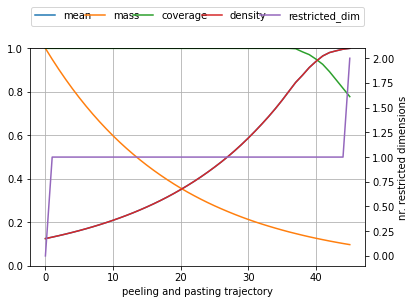

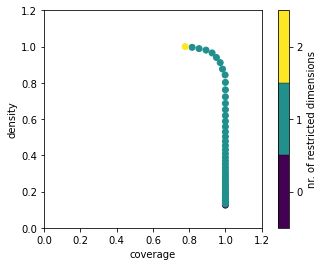

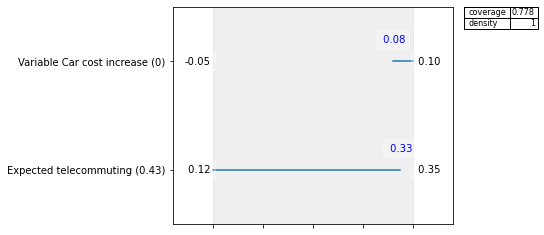

In [22]:
# has to be done for eeach selecte dmodel outcome 
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect()

## middleshort 

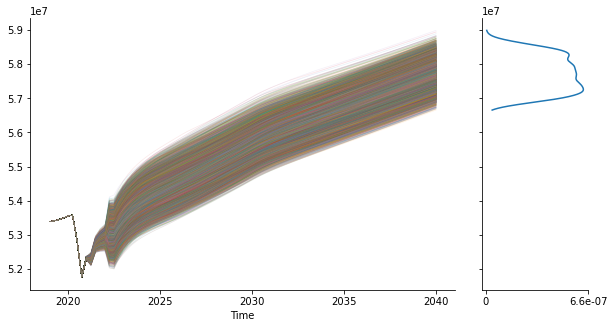

In [23]:

experiments, outcomes = results

fig, _ = lines(experiments, outcomes,outcomes_to_show = "Vehicles per month on the road[middleshort trips]" , density =Density.KDE,  titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

In [26]:
def classify(data):
    #get the output for modal split PT
    VehMonthMiddleShort = data['Vehicles per month on the road[short trips]']
    return VehMonthMiddleShort [:, -1] < 57500000

In [27]:
# has to be done for eeach selecte dmodel outcome 
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect()

AssertionError: 

# tele

In [11]:
def classify(data):
    #get the output for modal split PT
    teletrips = data['Total Telecommuting movements per month']
    return teletrips[:, -1] > 52000000

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 2581 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3572, coverage: 0.6919798527702441, density: 1.0 restricted_dimensions: 1


coverage     0.69198
density      1.00000
id          20.00000
mass         0.35720
mean         1.00000
res_dim      1.00000
Name: 20, dtype: float64

                          box 20                   
                             min   max    qp values
Expected telecommuting  0.267851  0.35  [0.0, -1.0]



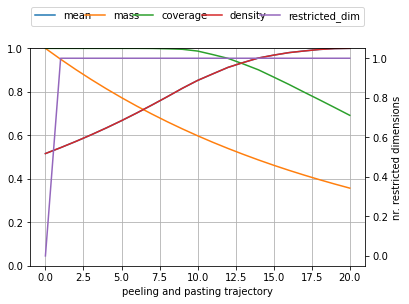

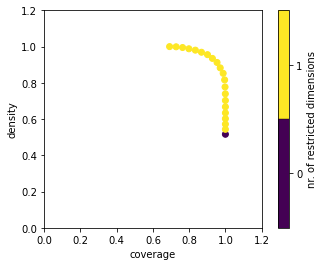

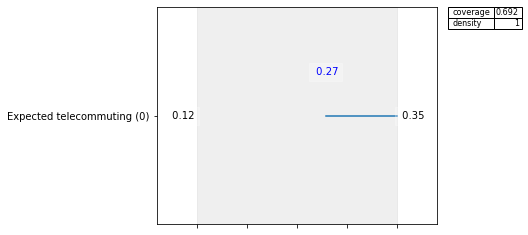

In [12]:
# has to be done for eeach selecte dmodel outcome 
prim_obj = prim.setup_prim(results, classify, threshold=0.8, threshold_type=1)
box_1 = prim_obj.find_box()
box_1.show_ppt()
box_1.show_tradeoff()

box_1.inspect(style="graph", boxlim_formatter="{: .2f}")
box_1.inspect()

In [ ]:
box_2 = prim_obj.find_box()
box_2.show_ppt()
box_2.show_tradeoff()

box_2.inspect(style="graph", boxlim_formatter="{: .2f}")
box_2.inspect()

## Envelope plots

In [ ]:
grouping_specifiers_tele={'Low telecommuting': (0.12, 0.2), 
                     'High telecommuting': (0.2, 0.35)
                     }

grouping_specifiers_PTatt={'Low increase of positive attitude': (0.1, 0.2), #0.1, 0.25
                     'High increase of positive attitude': (0.5, 0.6) #0.25, 0.6
                     }


### PT trips KPI

In [ ]:
#import matplotlib.pyplot as plt
#from ema_workbench.analysis.plotting import lines, Density, kde_over_time, envelopes, multiple_densities

experiments, outcomes = results


envelopes(experiments, outcomes, outcomes_to_show=['Total Public Transport movements per month'],  
        group_by= 'Expected telecommuting', grouping_specifiers=grouping_specifiers_tele, titles=False, 
           legend=True, density =Density.KDE, ylabels=None, fill=True, )
plt.ylabel('Total Public Transport movements per month')


In [ ]:
#import matplotlib.pyplot as plt
#from ema_workbench.analysis.plotting import lines, Density, kde_over_time, envelopes, multiple_densities

experiments, outcomes = results


envelopes(experiments, outcomes, outcomes_to_show=['Total Public Transport movements per month'],  
        group_by= 'Perception public transport rate of gaining back trust', grouping_specifiers=grouping_specifiers_PTatt, titles=False, 
           legend=True, density =Density.KDE, ylabels=None, fill=True, )
plt.ylabel('Total Public Transport movements per month')

### Tele trips KPI 

In [ ]:
#import matplotlib.pyplot as plt
#from ema_workbench.analysis.plotting import lines, Density, kde_over_time, envelopes, multiple_densities

experiments, outcomes = results



envelopes(experiments, outcomes, outcomes_to_show=['Total Telecommuting movements per month'],
       group_by= 'Expected telecommuting', grouping_specifiers=grouping_specifiers_tele, titles=False,
          legend=True, density =Density.KDE, ylabels=None, fill=True, )
plt.ylabel('Tele movements')


In [ ]:
#import matplotlib.pyplot as plt
#from ema_workbench.analysis.plotting import lines, Density, kde_over_time, envelopes, multiple_densities

experiments, outcomes = results



envelopes(experiments, outcomes, outcomes_to_show=['Total Telecommuting movements per month'],
       group_by= 'Perception public transport rate of gaining back trust', grouping_specifiers=grouping_specifiers_PTatt, titles=False,
          legend=True, density =Density.KDE, ylabels=None, fill=True, )
plt.ylabel('Tele movements')

### Modal split PT


In [ ]:
#import matplotlib.pyplot as plt
#from ema_workbench.analysis.plotting import lines, Density, kde_over_time, envelopes, multiple_densities

experiments, outcomes = results



envelopes(experiments, outcomes, outcomes_to_show=['Total Modal split PT'],
       group_by= 'Perception public transport rate of gaining back trust', grouping_specifiers=grouping_specifiers_PTatt, titles=False,
          legend=False, density =Density.KDE, ylabels=None, fill=True, )
plt.ylabel('Modal split PT')